## Life Expectancy Animation
### Step 1: Download the Data


In [470]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import imageio

### Step 2
inspect the dimensions you should have 200+ rows and 60+ columns.
make sure the country names are in the row index
make sure the years are in the column index
use df.columns to check whether the column index consists of strings or integers (both are ok but you need to know)


In [412]:
life = pd.read_csv('life_expectancy_years.csv')
fert = pd.read_csv('sp_dyn_tfrt_in.csv')
pop = pd.read_csv('population_total.csv')

In [413]:
life.shape, fert.shape, pop.shape

((195, 302), (208, 62), (197, 302))

In [414]:
life.columns,fert.columns,pop.columns

(Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
        '1807', '1808',
        ...
        '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
        '2100'],
       dtype='object', length=302),
 Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
        '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
        '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
        '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
        '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
        '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
        '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
       dtype='object'),
 Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
        '1807', '1808',
        ...
        '2091', '2092', '2093', '2094', '2095', '2096', '2097', '

In [415]:
fert

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,4.82,4.66,4.47,4.27,4.06,3.84,3.63,3.42,3.23,...,1.78,1.79,1.81,1.83,1.85,1.87,1.89,1.90,1.90,1.90
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37
3,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Samoa,7.65,7.64,7.63,7.60,7.57,7.52,7.46,7.40,7.33,...,4.28,4.21,4.15,4.09,4.03,3.98,3.93,3.88,3.83,3.79
204,Yemen,7.94,7.96,7.99,8.03,8.07,8.11,8.17,8.22,8.28,...,4.55,4.44,4.33,4.21,4.10,3.99,3.89,3.79,3.70,3.61
205,South Africa,6.04,6.03,6.01,5.99,5.96,5.92,5.88,5.83,5.78,...,2.58,2.56,2.54,2.51,2.48,2.46,2.43,2.40,2.38,2.36
206,Zambia,7.12,7.17,7.21,7.25,7.27,7.29,7.30,7.32,7.33,...,5.33,5.23,5.13,5.03,4.92,4.81,4.72,4.63,4.56,4.50


In [473]:
life

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


In [474]:
pop

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,315k,314k,314k,314k,313k,313k,312k,312k,311k,310k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,54.5M,54.4M,54.3M,54.1M,54M,53.8M,53.7M,53.5M,53.4M,53.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,79.8M,79.8M,79.7M,79.7M,79.6M,79.5M,79.5M,79.4M,79.3M,79.2M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,74.4M,75.2M,76M,76.8M,77.6M,78.4M,79.2M,80M,80.8M,81.5M


### Step 3
Choose fertility and life expectancy for the year 2015 and put them into a single table.

In [416]:
df = pd.DataFrame({'Country' : fert['country'],'fertility': fert['2015'], 'life_exp': life['2015']})
df.head()

,Country,fertility,life_exp
0,Aruba,1.85,61.9
1,Afghanistan,4.98,63.5
2,Angola,5.77,78.1
3,Albania,1.68,82.0
4,Andorra,NaN,73.2


### Step 4
Remove all rows with missing values

In [417]:
df=df.dropna()
df

,Country,fertility,life_exp
0,Aruba,1.85,61.9
1,Afghanistan,4.98,63.5
2,Angola,5.77,78.1
3,Albania,1.68,82.0
5,United Arab Emirates,1.54,76.5
...,...,...,...
190,Tunisia,2.25,70.1
191,Turkey,2.10,68.2
192,Tanzania,5.08,62.3
193,Uganda,5.39,60.8


### Step 5
Draw a scatterplot of fertility over life expectancy in 2015.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Fertility v.s. Life expectancy in 2015')

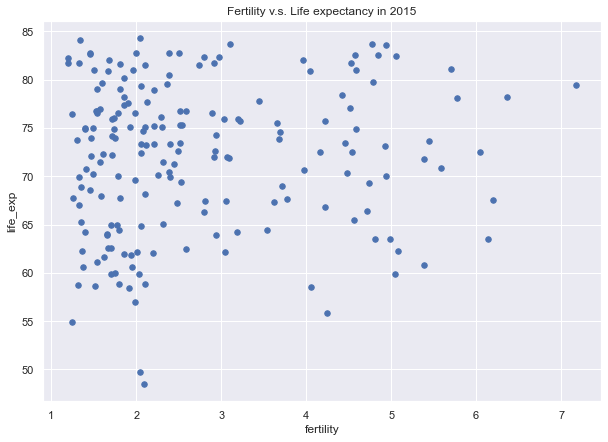

In [530]:
df.plot.scatter(x='fertility', y='life_exp',s=30.0,figsize=(10,7))
plt.title("Fertility v.s. Life expectancy in 2015")

### Step 6
Repeat steps 3-5 for the year 1960. What differences do you observe?
 

  I didn't find any differences between these plots.

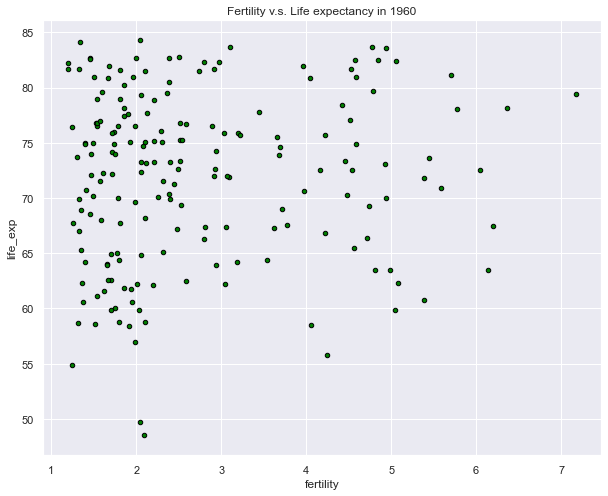

In [476]:
df1 = pd.DataFrame({'Country' : fert['country'],'fertility': fert['1960'], 'life_exp': life['1960']})
df1=df.dropna()
df1.plot(kind = 'scatter', y = 'life_exp', x = 'fertility', c='green',edgecolor='black',linewidth=1)
plt.title('Fertility v.s. Life expectancy in 1960')
plt.show()

### Step 7
Write a function that allows you to draw a scatterplot for any given year.

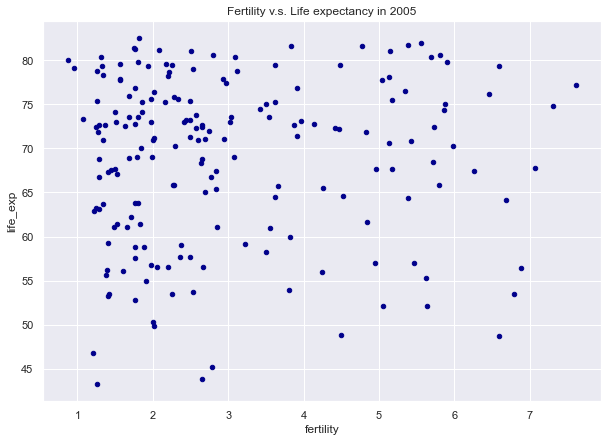

In [533]:
def given_yr(year):
  df2 = pd.DataFrame({'Country': fert['country'],'fertility': fert[year], 'life_exp': life[year]})
  df2 = df2.dropna()
  df2.plot.scatter(y='life_exp', x='fertility',c='darkblue',figsize=(10,7))
  #sns.scatterplot(data=df2, y='life_exp', x='fertility',figsize=(10,7))
  plt.title(f'Fertility v.s. Life expectancy in {year}')
##display(df2)
given_yr('2005')

### Step 8
Create one scatterplot for each year from 1960 to 2010 and write it to a file

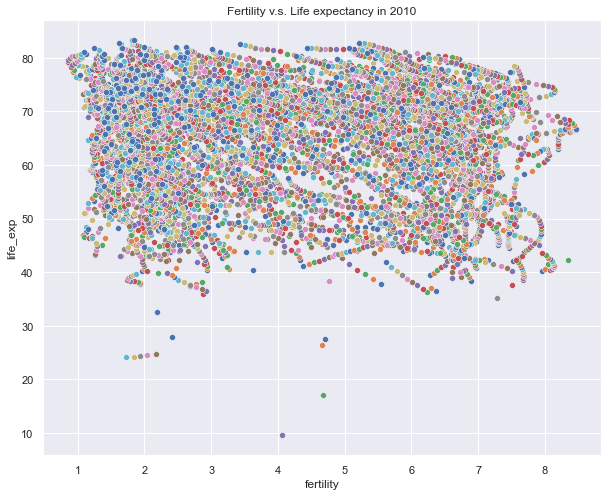

In [453]:
for year in range(1960, 2011):
    given_yr(f'{year}')
    plt.savefig(f'{year}.png')

### Step 9
Connect the scatterplots to an animation.

In [454]:
import imageio
plots = [ imageio.imread(f'{year}.png')
for year in range(1960, 2011) ] 
imageio.mimsave('animation.gif', plots, fps=20)

### Step 10
Also read the population file. Because the population is written like 500k or 20M, you need a conversion function that converts a single value:



In [495]:
def pop_convert(x):
    if x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('k'):
        return float(x[:-1]) * 100_000

In [496]:
df5 = pd.DataFrame({'country': pop['country'], 'population': pop['2010']})
df5 = df5.dropna()
df5['population'] = df5['population'].apply(pop_convert)
df5['population']

0      29200000.0
1      23400000.0
2       2950000.0
3       8450000.0
4       8550000.0
          ...    
192    18600000.0
193    23200000.0
194    51200000.0
195    13600000.0
196    12700000.0
Name: population, Length: 197, dtype: float64

### Step 11
Divide the population by 100_000. Use the population to control the size of the bubbles in the scatterplot (df.plot.scatter accepts an argument s of the type pd.Series).



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'World in 2010')

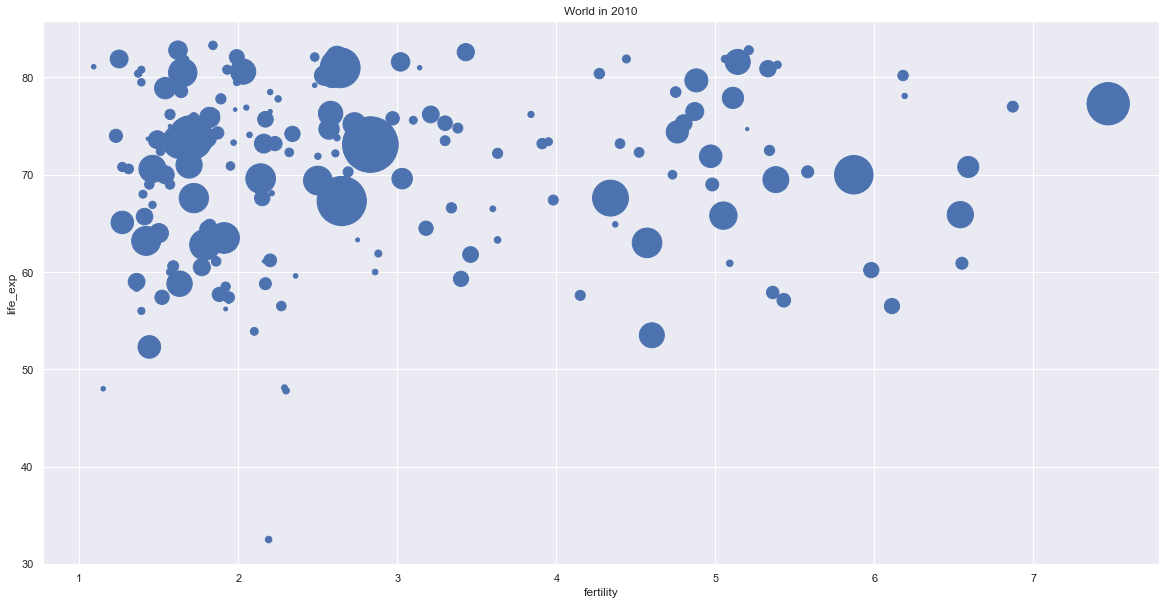

In [497]:
df5['population'] = df5['population'] / 100_000
df5
df6 = pd.DataFrame({ 'population': df5['population'], 'life_exp': life['2010'], 'fertility': fert['2010']})
df6 = df6.dropna()
df6
df6.plot.scatter(y='life_exp', x='fertility', s='population')
plt.title("World in 2010")

### Step 12
Let's color by continent:

Read a list of country-continent pairs (continents.csv ).

Create an extra continent column.
Ignore countries for which the continent information does not fit (probably because of spelling).
Use the continents to color the scatterplot bubbles by continent.


In [514]:
continents = pd.read_csv('continents.csv', delimiter=";")
continents.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


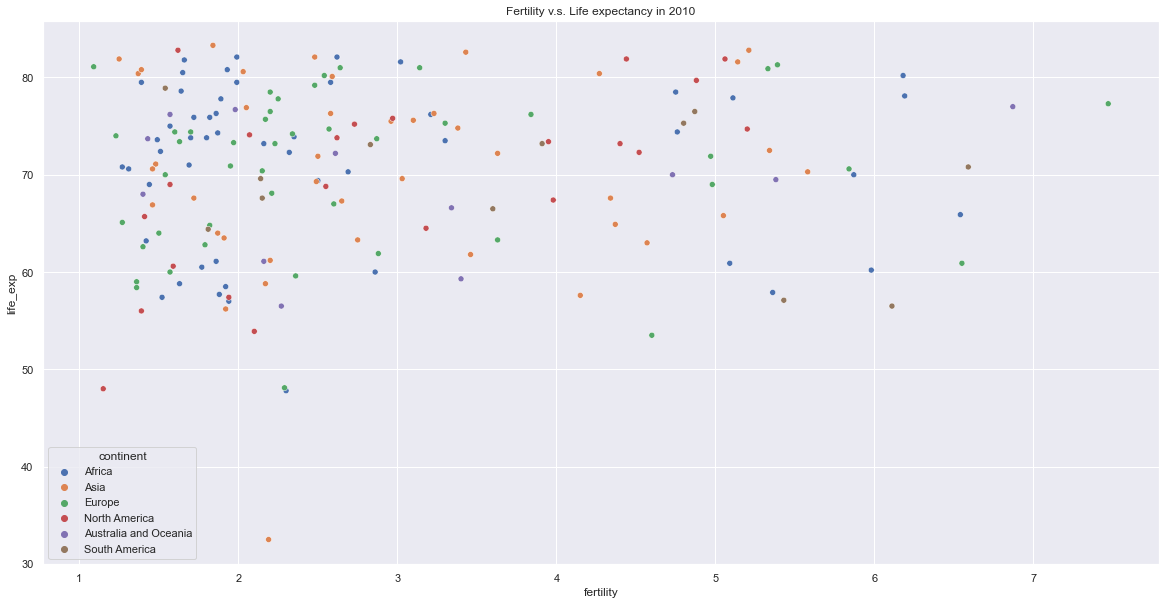

In [546]:
def pop_yr(year):
    df7 = pd.DataFrame({'continent': continents['continent'], 'population': df5['population'], 'life_exp': life[year], 'fertility': fert[year]})
    df7 = df7.dropna()
    df7
    sns.scatterplot(data=df7, y='life_exp', x='fertility', hue='continent',sizes='popoulation')
    plt.title(f'Fertility v.s. Life expectancy in {year}')
pop_yr('2010')

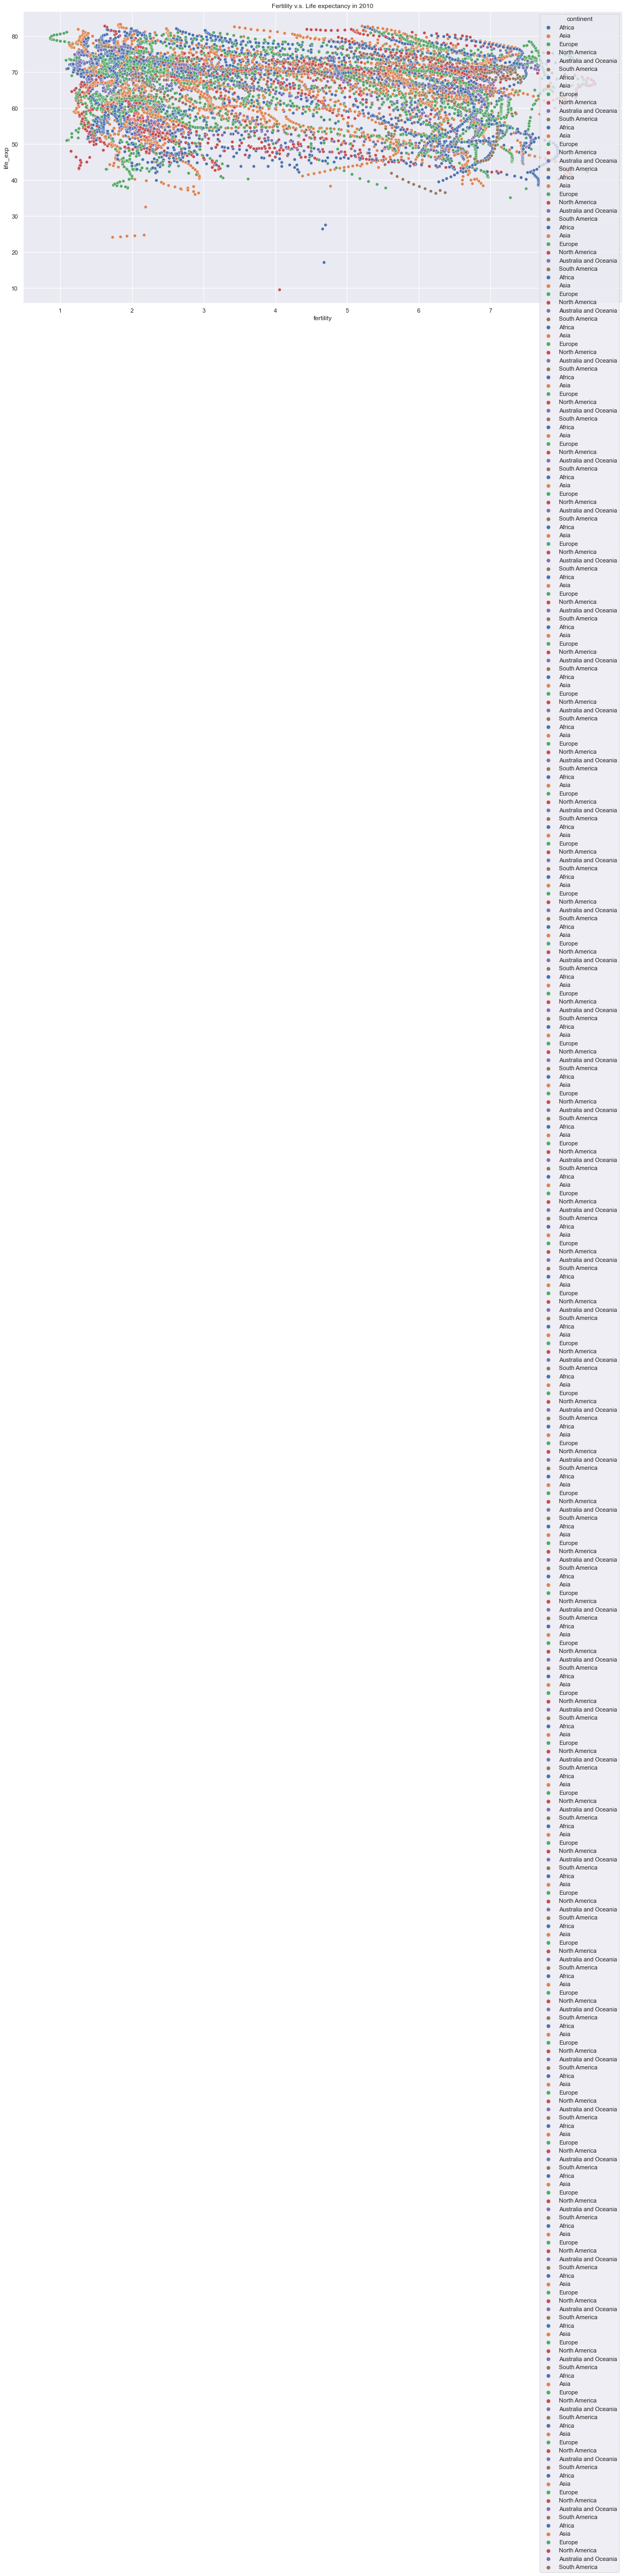

In [547]:
for year_pop in range(1960, 2011):
    pop_yr(f'{year_pop}')
    plt.savefig(f'{year_pop}.png')

In [517]:
import imageio
plots = [ imageio.imread(f'{year}.png')
for year in range(1960, 2011) ] 
imageio.mimsave('animation.gif', plots, fps=20)

